In [1]:
import requests
import re
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#reading movie details
movie=pd.read_csv(r"C:\Users\admin\Desktop\internship dataset\movies.csv")
movie.shape

(9742, 3)

In [6]:
movie.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rating=pd.read_csv(r"C:\Users\admin\Desktop\internship dataset\ratings.csv")
rating.shape

(100836, 4)

In [7]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
rating['userId'].nunique()

610

In [10]:
# Group ratings by movieId and count the number of ratings for each movie
ratings_count = rating.groupby('movieId').size().reset_index(name='rating_count')

# Merge movie titles with their corresponding rating counts
movies_with_ratings = movie.merge(ratings_count, on='movieId', how='inner')

# Find the movie with the maximum number of ratings
max_ratings_movie = movies_with_ratings[movies_with_ratings['rating_count'] == movies_with_ratings['rating_count'].max()]

print("Movie with maximum number of ratings:")
print(max_ratings_movie[['title','rating_count']])

Movie with maximum number of ratings:
                   title  rating_count
314  Forrest Gump (1994)           329


In [12]:
tags = pd.read_csv(r"C:\Users\admin\Desktop\internship dataset\tags.csv")

# Filter the tags for 'Matrix, The (1999)' movie
matrix_tags = tags[tags['movieId'] == 2571]

# Display the unique tags for 'Matrix, The (1999)'
unique_matrix_tags = matrix_tags['tag'].unique()
print("Tags for 'Matrix, The (1999)':")
print(unique_matrix_tags)


Tags for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [13]:
# Find the movie ID for "Terminator 2: Judgment Day (1991)"
terminator_id = movie[movie['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

# Calculate the average rating for Terminator 2 using the movie ID
average_rating = rating[rating['movieId'] == terminator_id]['rating'].mean()

print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


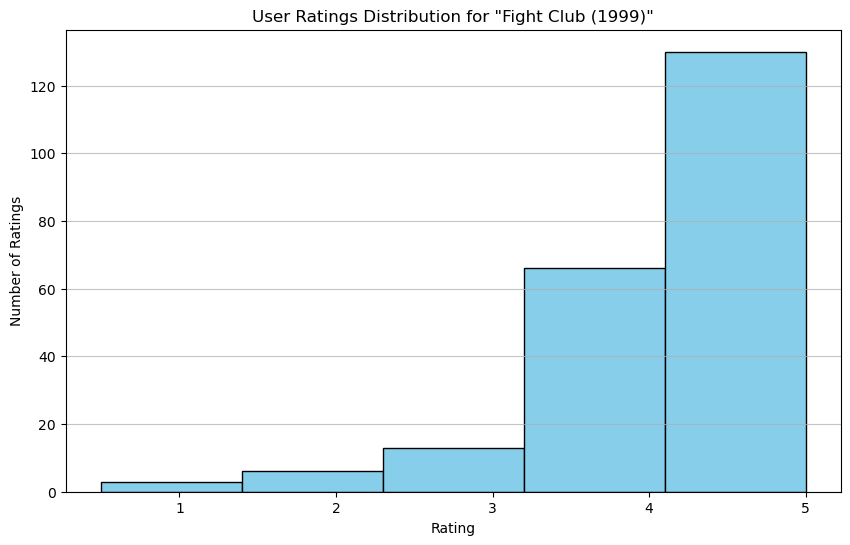

In [21]:
x = movie[movie['title'] == 'Fight Club (1999)']['movieId'].values[0]

# Filter ratings for the specified movieId
y = rating[rating['movieId'] ==x]

# Plot a histogram of user ratings
plt.figure(figsize=(10, 6))
plt.hist(y['rating'], bins=5, color='skyblue', edgecolor='black')
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.grid(axis='y', alpha=0.75)

plt.show()

In [16]:
ratings_grouped = rating.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
ratings_grouped.columns = ['movieId', 'rating_count', 'rating_mean']


merged_df = pd.merge(movie, ratings_grouped, on='movieId', how='inner')

#Filter only those movies which have more than 50 user ratings
filtered_movies = merged_df[merged_df['rating_count'] > 50]

print(filtered_movies)

      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8287   106782   Wolf of Wall Street, The (2013)   
8354   109374  Grand Budapest Hotel, The (2014)   
8358   109487               Interstellar (2014)   
8457   112852    Guardians of the Galaxy (2014)   
8673   122904                   Deadpool (2016)   

                                           genres  rating_count  rating_mean  
0     Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                      Adventure|Children|Fantasy           110     3.431818  
2                                  Comedy|Romance            52     3.259615  
5                           Action|Crime|Thriller           102     3.9

In [23]:
# Find the movie with the highest average rating
most_popular_movie = filtered_movies[filtered_movies['rating_mean'] == filtered_movies['rating_mean'].max()]

# Display the most popular movie
print("The most popular movie based on average user ratings:")
print(most_popular_movie[['title', 'rating_mean']])

The most popular movie based on average user ratings:
                                title  rating_mean
277  Shawshank Redemption, The (1994)     4.429022


In [24]:
sorted_movies = merged_df.sort_values(by='rating_count', ascending=False)

# Select the top 5 popular movies
top_5_movies = sorted_movies.head(5)

# Display the top 5 popular movies

print(top_5_movies[['title']])


                                 title
314                Forrest Gump (1994)
277   Shawshank Redemption, The (1994)
257                Pulp Fiction (1994)
510   Silence of the Lambs, The (1991)
1938                Matrix, The (1999)


In [25]:
# Filter only Sci-Fi movies
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]

# Sort Sci-Fi movies by rating count in descending order
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)

# Select the third most popular Sci-Fi movie
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]

# Display the third most popular Sci-Fi movie
print("Third most popular Sci-Fi movie based on number of user ratings:")
print(third_most_popular_sci_fi_movie[['title', 'rating_count']])

Third most popular Sci-Fi movie based on number of user ratings:
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [26]:
df2=pd.read_csv(r"C:\Users\admin\Desktop\internship dataset\links.csv")

In [27]:
df2.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [28]:
merged_df1 = pd.merge(df2,filtered_movies, on='movieId', how='inner')


In [29]:
merged_df1.head()

,movieId,imdbId,tmdbId,title,genres,rating_count,rating_mean
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,6,113277,949.0,Heat (1995),Action|Crime|Thriller,102,3.946078
4,7,114319,11860.0,Sabrina (1995),Comedy|Romance,54,3.185185


In [30]:
# Find the movie with the highest rating count
max_rating_movie = merged_df1[merged_df1['rating_count'] == merged_df1['rating_count'].max()]

print(max_rating_movie[['movieId']])

    movieId
61      356


In [32]:
sci_fi_movies = merged_df1[merged_df1['genres'].str.contains('Sci-Fi')]

# Find the movie with the highest IMDb rating
max_imdb_movie = sci_fi_movies[sci_fi_movies['rating_count'] == sci_fi_movies['rating_count'].max()]


print(max_imdb_movie[['movieId']])


     movieId
248     2571
